**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

**MOUNTING G. DRIVE DAB PEMANGGILAN DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/PRAK KECERDASAN/DATA SET/Depression Professional Dataset.csv")
print("Dataset berhasil dimuat. Dimensi dataset:", data.shape)
print(data.head())

Dataset berhasil dimuat. Dimensi dataset: (2054, 11)
   Gender  Age  Work Pressure  Job Satisfaction Sleep Duration Dietary Habits  \
0  Female   37            2.0               4.0      7-8 hours       Moderate   
1    Male   60            4.0               3.0      5-6 hours      Unhealthy   
2  Female   42            2.0               3.0      5-6 hours       Moderate   
3  Female   44            3.0               5.0      7-8 hours        Healthy   
4    Male   48            4.0               3.0      7-8 hours       Moderate   

  Have you ever had suicidal thoughts ?  Work Hours  Financial Stress  \
0                                    No           6                 2   
1                                   Yes           0                 4   
2                                    No           0                 2   
3                                   Yes           1                 2   
4                                   Yes           6                 5   

  Family History of M

**PEMERIKSAAN STRUKTUR DAN STATISTIK DATA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [5]:
data.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
print(data.describe())

               Age  Work Pressure  Job Satisfaction   Work Hours  \
count  2054.000000    2054.000000       2054.000000  2054.000000   
mean     42.171860       3.021908          3.015093     5.930867   
std      11.461202       1.417312          1.418432     3.773945   
min      18.000000       1.000000          1.000000     0.000000   
25%      35.000000       2.000000          2.000000     3.000000   
50%      43.000000       3.000000          3.000000     6.000000   
75%      51.750000       4.000000          4.000000     9.000000   
max      60.000000       5.000000          5.000000    12.000000   

       Financial Stress  
count       2054.000000  
mean           2.978578  
std            1.413362  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


Depression
0    1851
1     203
Name: count, dtype: int64


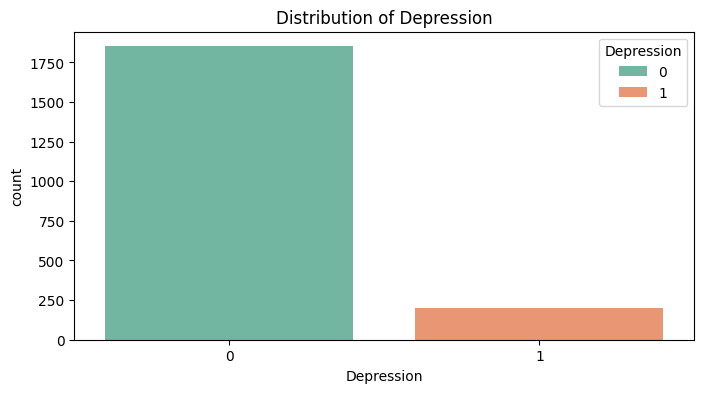

In [24]:
print(data["Depression"].value_counts())

# Bar plot untuk kolom 'Gender'
plt.figure(figsize=(8, 4))
sns.countplot(x="Depression", hue="Depression", data=data, palette="Set2")
plt.title("Distribution of Depression")
plt.show()

**VISUALISASI JUMLAH DATA DARI SETIAP KOLOM NUMERIK**

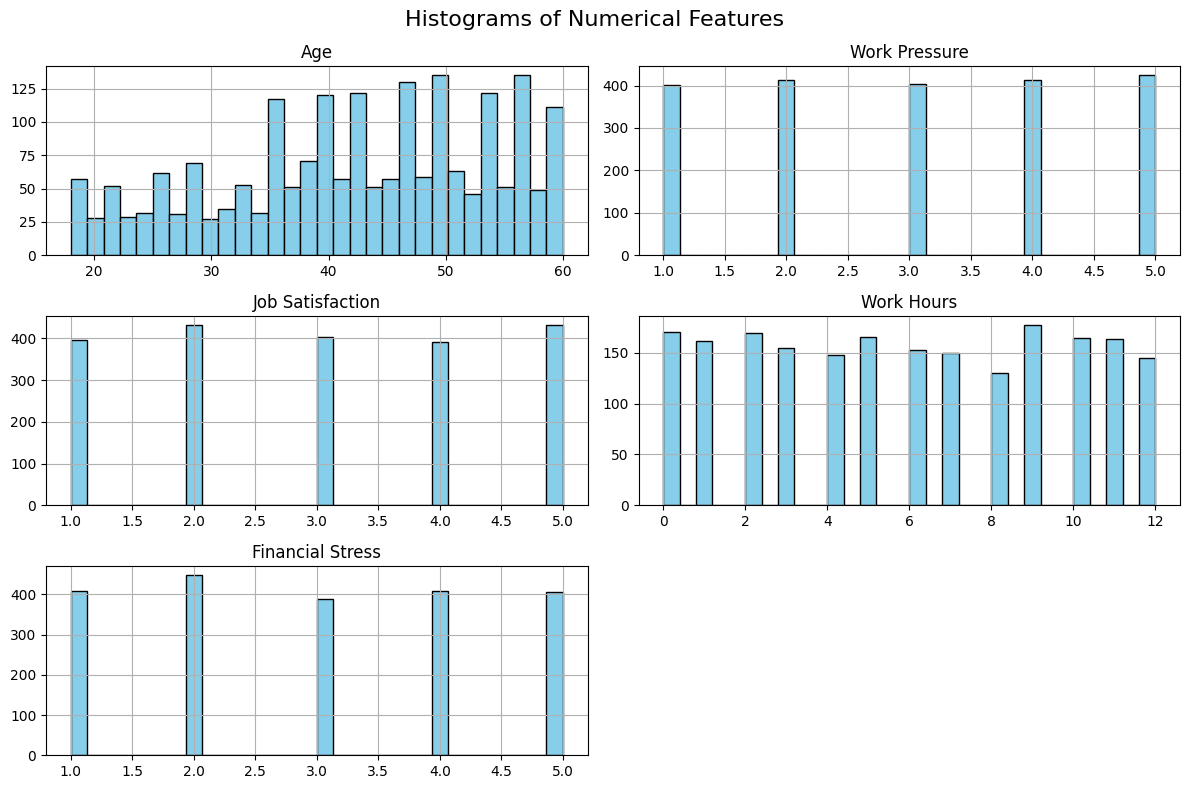

In [8]:
# Ambil hanya kolom numerik asli
numeric_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

# Plot histogram
data[numeric_cols].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


**VISUALISASI JUMLAH DATA DARI SETIAP KOLOM OBJECT**

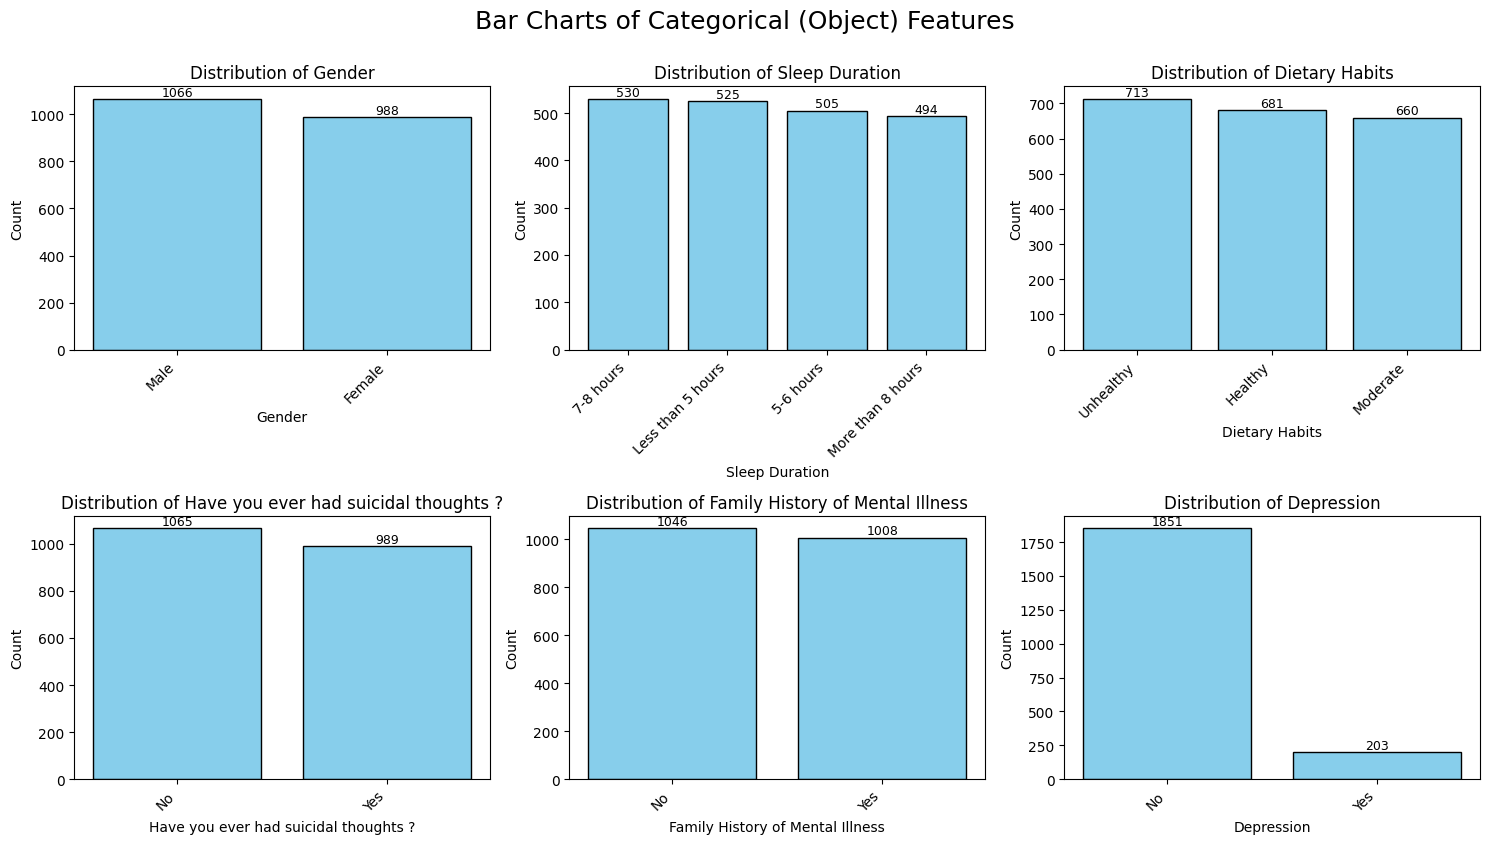

In [9]:
# Ambil hanya kolom dengan tipe data object
object_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
               'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness',
               'Depression']

# Plot bar chart untuk masing-masing kolom kategorikal
plt.figure(figsize=(15, 8))

for i, col in enumerate(object_cols):
    plt.subplot(2, 3, i + 1)  # 2 baris, 3 kolom
    counts = data[col].value_counts()
    bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

    # Tambahkan angka di atas setiap bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle("Bar Charts of Categorical (Object) Features", fontsize=18, y=1.05)
plt.show()


**PEMERIKSAAN NILAI KOSONG & NILAI DUPLIKAT**

In [10]:
print(data.isnull().sum())

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [11]:
# Cek duplikasi
print("Jumlah duplikat:", data.duplicated().sum())

Jumlah duplikat: 0


**VISUALISASI HEATMAP UNTUK CEK NILAI KOSONG**

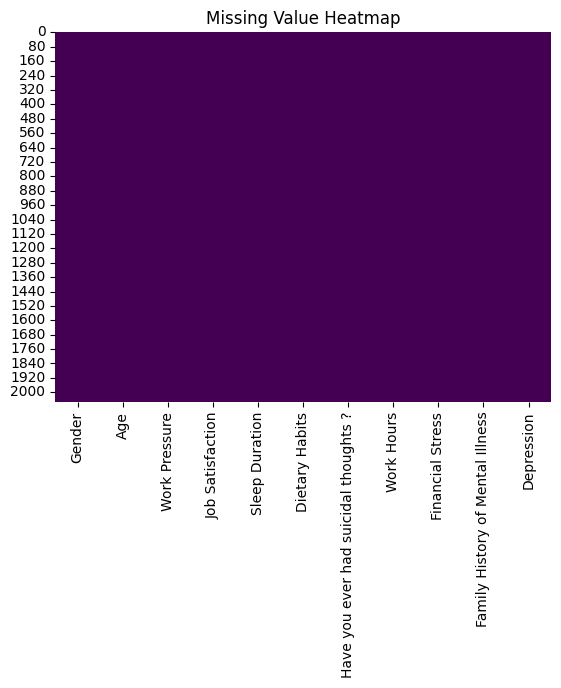

In [12]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [13]:
# Boxplot dan distribusi numerik
numerik = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

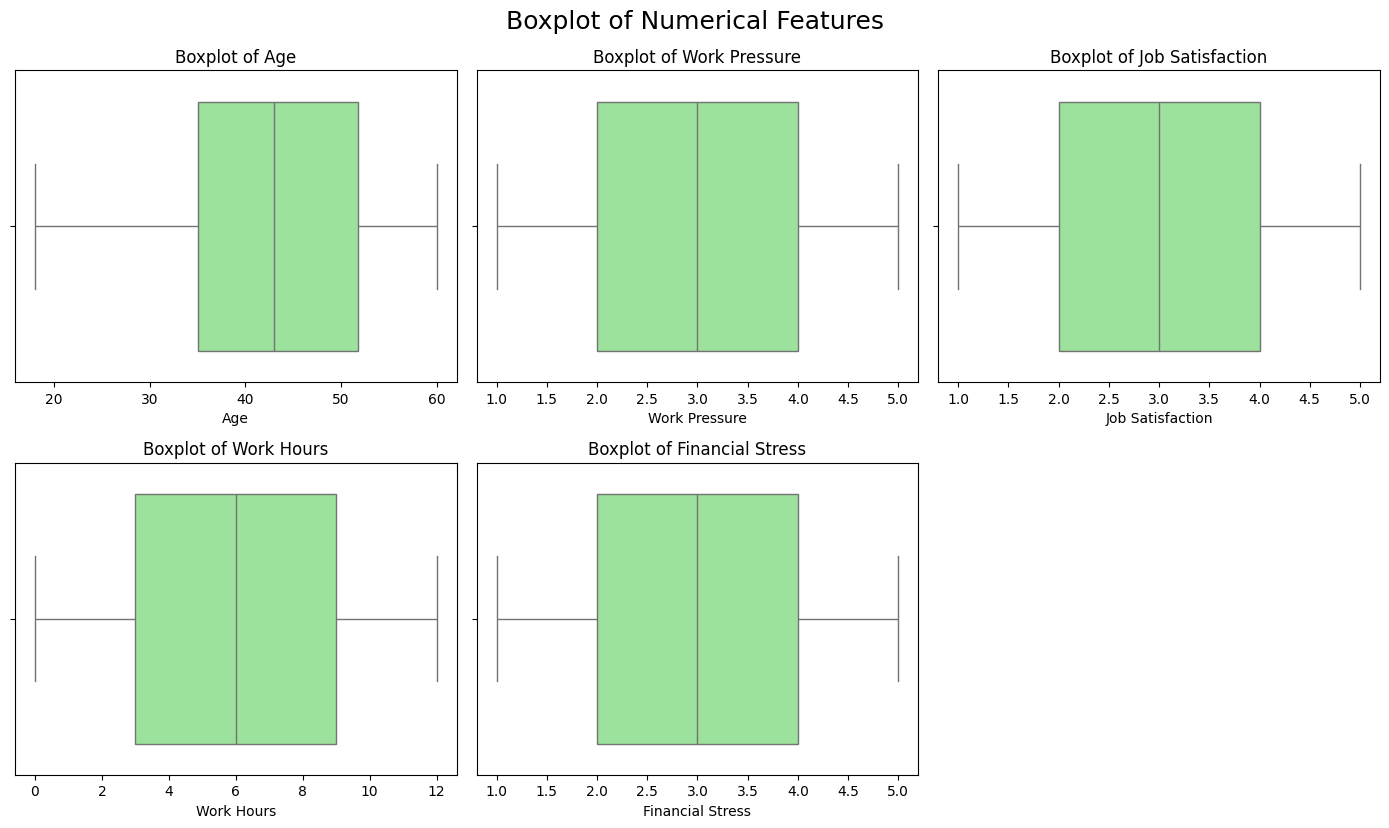

In [14]:
# Daftar kolom numerik murni
numeric_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

# Buat boxplot untuk masing-masing kolom numerik
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.suptitle("Boxplot of Numerical Features", fontsize=18, y=1.03)
plt.show()


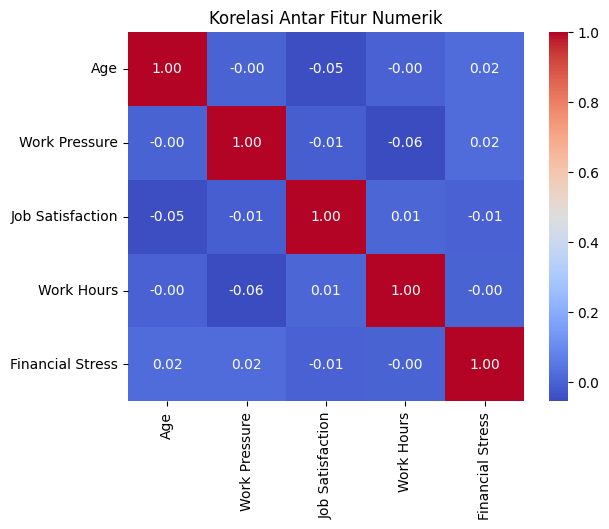

In [15]:
# Korelasi atribut numerik
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


**ENCODE KOLOM KATEGORIK**

In [16]:
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

**PISAHKAN FITUR DAN LABEL**

In [17]:
X = data.drop("Depression", axis=1)
y = data["Depression"]

**LAKUKAN NORMALISASI**

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**SPLIT DATA (TRAIN - TEST)**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

**TANGANI IMBALANCE (SMOTE)**

In [20]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

**VISUALISASI PERUBAHAN DISTRIBUSI **

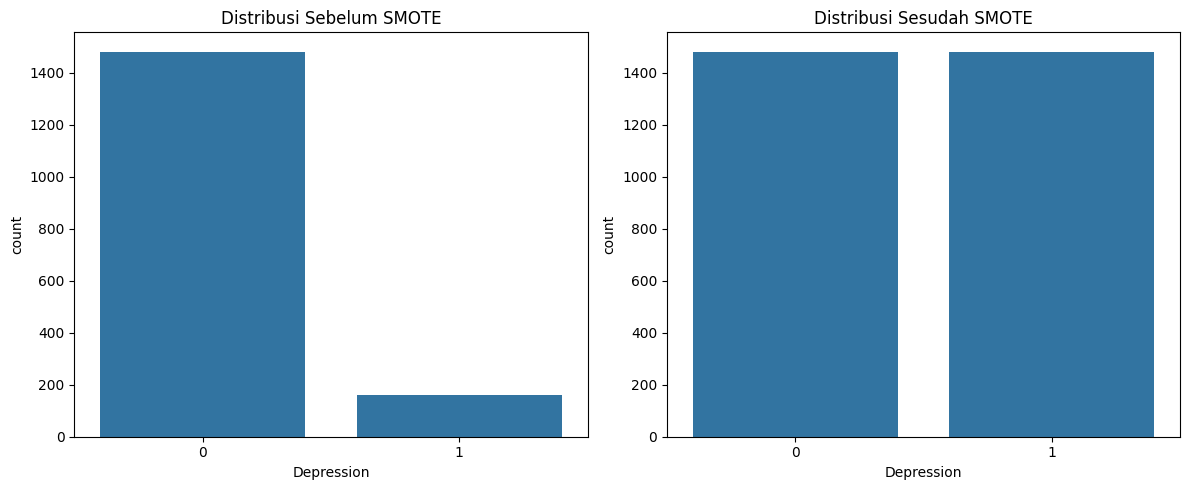

In [21]:
# Buat figure dengan 1 baris 2 kolom
plt.figure(figsize=(12, 5))

# Plot kiri: Sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Distribusi Sebelum SMOTE")

# Plot kanan: Sesudah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm)
plt.title("Distribusi Sesudah SMOTE")

plt.tight_layout()
plt.show()


**TRAINING MODEL KNN + GRIDSEARCH**

In [22]:
param_grid = {'n_neighbors': range(3, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_sm, y_train_sm)

print("Best K:", grid.best_params_)

Best K: {'n_neighbors': 4}


**EVALUASI MODEL**


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       370
           1       0.48      0.78      0.60        41

    accuracy                           0.90       411
   macro avg       0.73      0.84      0.77       411
weighted avg       0.93      0.90      0.91       411



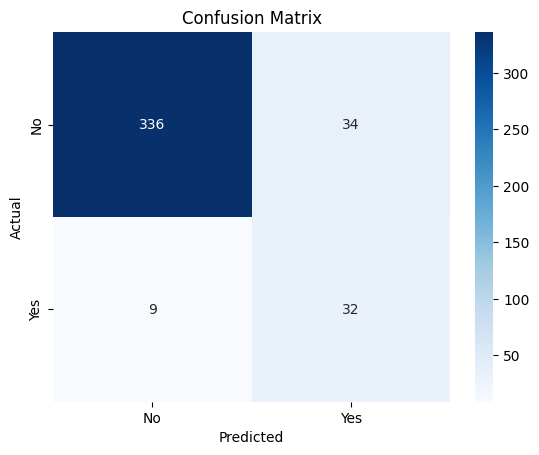

In [23]:
y_pred = grid.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**VISUALISASI KORELASI**

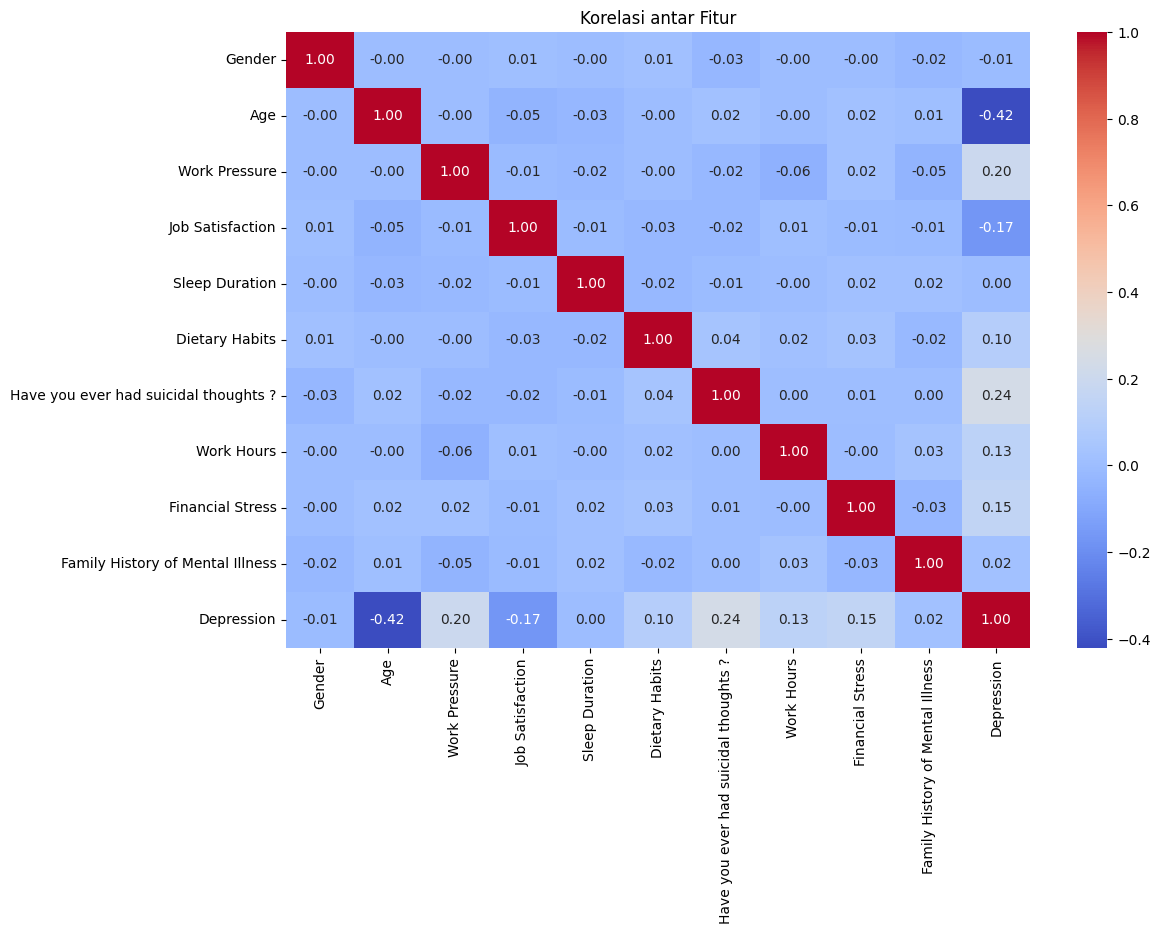

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur")
plt.show()

**ROC CURVE**

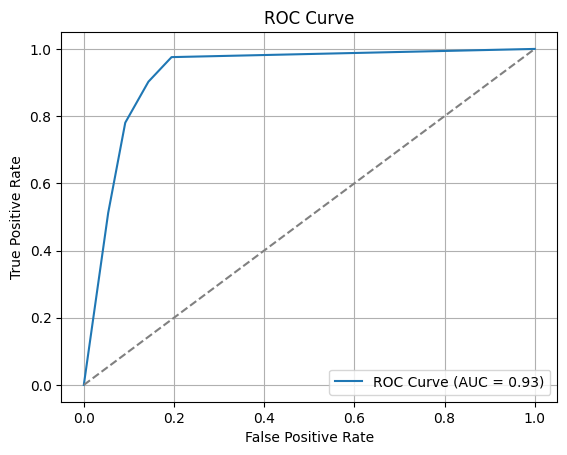

In [27]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


**VISUALISASI MODEL DECISION TREE**

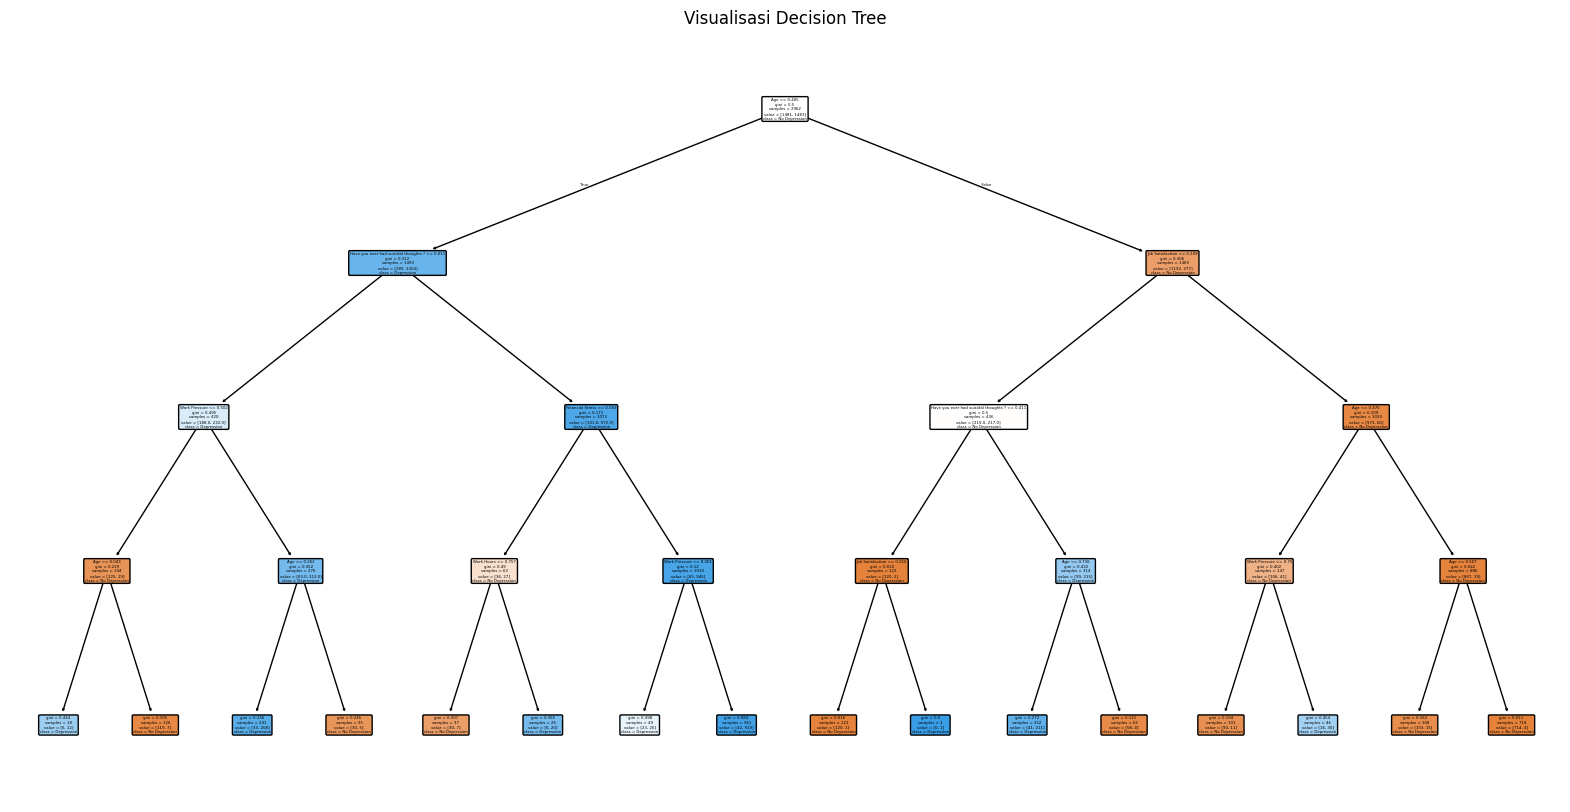

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Latih model Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train_sm, y_train_sm)

# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Depression', 'Depression'], filled=True, rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


**PCA (PRINCIPAL COMPONEN ANALYSIS)**

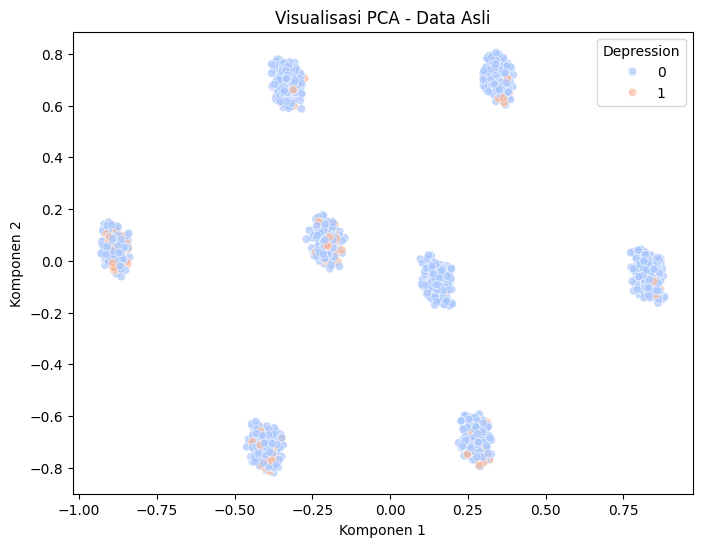

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.7)
plt.title("Visualisasi PCA - Data Asli")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.show()


**SHAP (SHapley Additive exPlanations)**
Untuk interpretasi model (fitur mana yang penting). Dengan menggunakan KernelExplainer (lebih lambat)

  0%|          | 0/50 [00:00<?, ?it/s]

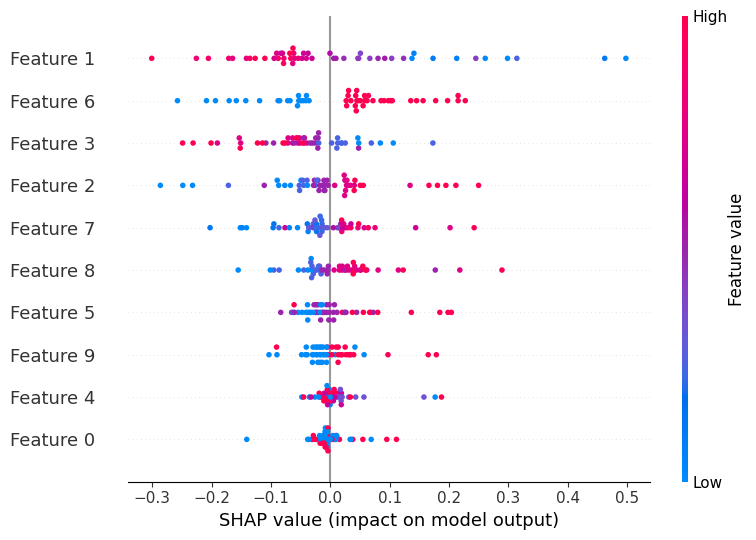

In [30]:
import shap
explainer = shap.KernelExplainer(grid.predict, X_train_sm[:100])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

shap.summary_plot(shap_values, X_test[:50])


**PAIRPLOT FITUR NUMERIK**

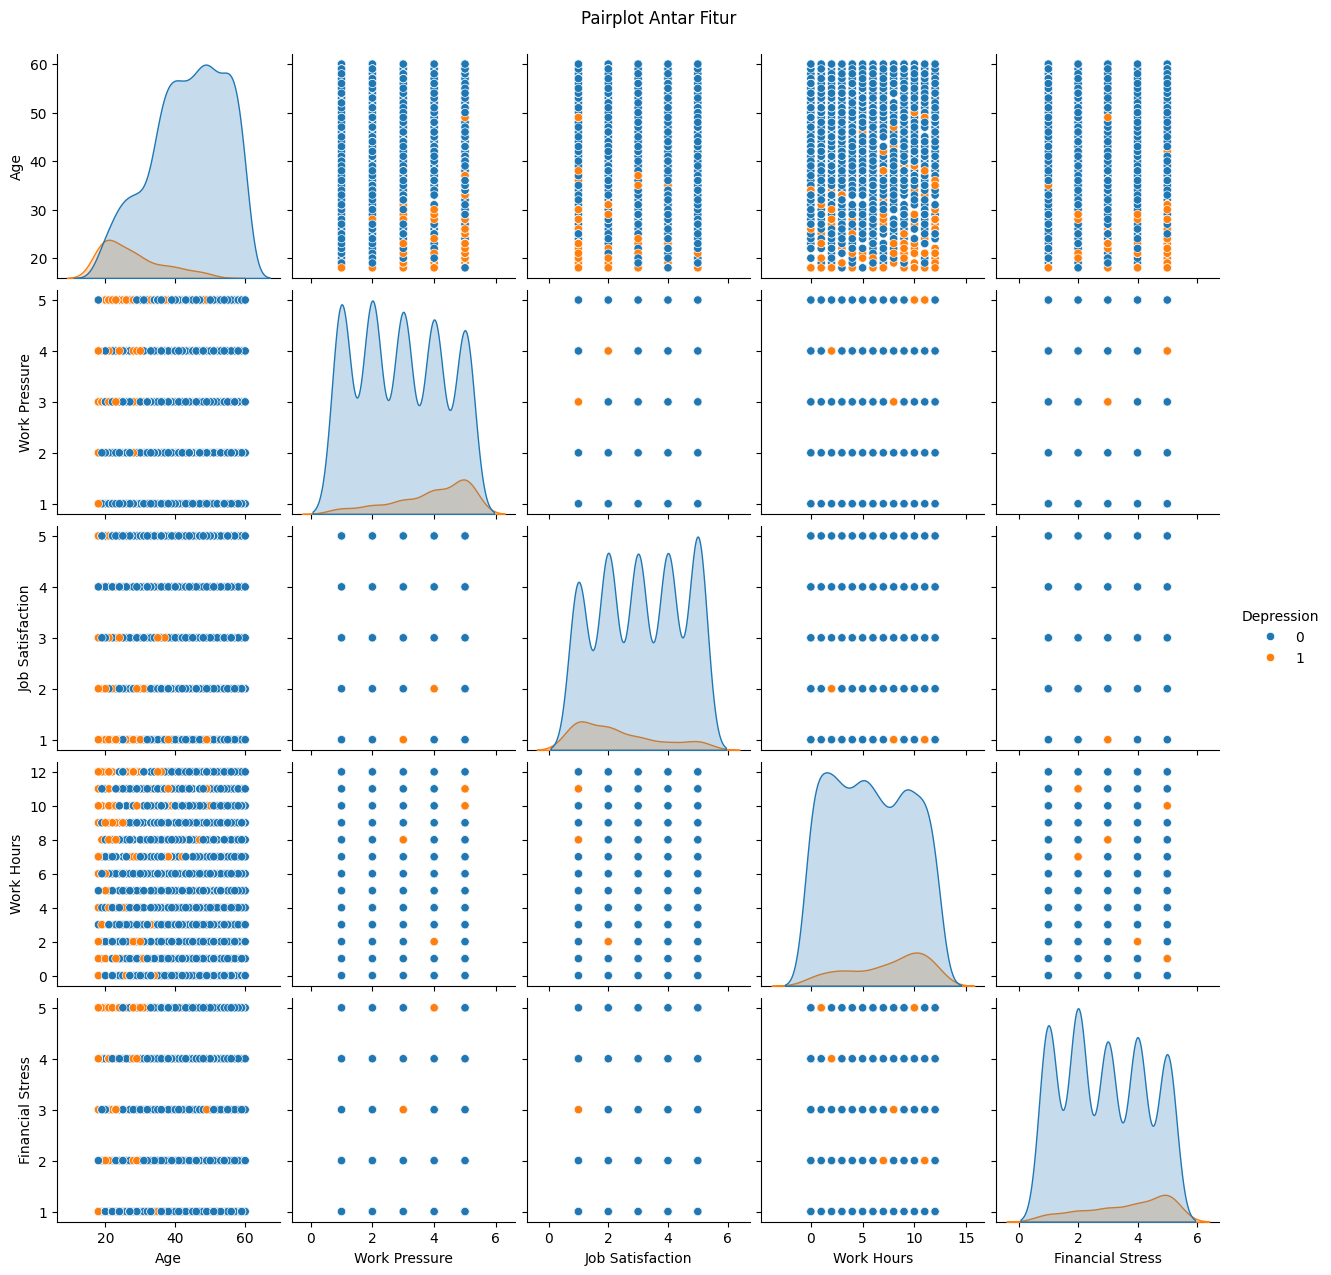

In [34]:
import seaborn as sns

# Contoh pairplot untuk fitur numerik
sns.pairplot(data[['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress', 'Depression']], hue='Depression')
plt.suptitle("Pairplot Antar Fitur", y=1.02)
plt.show()


**LAPORAN EVALUASI AKHIR**

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("\n===== Laporan Evaluasi Model KNN =====\n")
print(f"🔍 Accuracy       : {accuracy:.2f}")
print(f"📏 Precision      : {precision:.2f}")
print(f"📈 Recall         : {recall:.2f}")
print(f"🎯 F1-Score       : {f1:.2f}")
print(f"📐 AUC Score      : {roc_auc:.2f}")
print("\n🧾 Confusion Matrix:")
print(f"   True Negative  : {tn}")
print(f"   False Positive : {fp}")
print(f"   False Negative : {fn}")
print(f"   True Positive  : {tp}")

# Interpretasi ringkas
print("\n📝 Interpretasi:")
if recall > 0.70:
    print("- Model cukup baik dalam mendeteksi individu dengan depresi (recall tinggi).")
else:
    print("- Recall masih rendah, model mungkin gagal mendeteksi sebagian individu yang benar-benar depresi.")

if precision > 0.70:
    print("- Prediksi 'depresi' cukup akurat (precision tinggi), false positive rendah.")
else:
    print("- Precision masih rendah, mungkin banyak prediksi 'depresi' yang salah (false positive).")

print("\n📊 Analisis Korelasi Fitur dengan Depresi:")
cor_target = data.corr()['Depression'].sort_values(ascending=False)
print(cor_target)

print("\n🔎 Fitur dengan korelasi tertinggi ke depresi:")
print("-", cor_target[1:4].index.tolist())  # Top 3 selain 'Depression' itu sendiri



===== Laporan Evaluasi Model KNN =====

🔍 Accuracy       : 0.90
📏 Precision      : 0.48
📈 Recall         : 0.78
🎯 F1-Score       : 0.60
📐 AUC Score      : 0.93

🧾 Confusion Matrix:
   True Negative  : 336
   False Positive : 34
   False Negative : 9
   True Positive  : 32

📝 Interpretasi:
- Model cukup baik dalam mendeteksi individu dengan depresi (recall tinggi).
- Precision masih rendah, mungkin banyak prediksi 'depresi' yang salah (false positive).

📊 Analisis Korelasi Fitur dengan Depresi:
Depression                               1.000000
Have you ever had suicidal thoughts ?    0.239176
Work Pressure                            0.197509
Financial Stress                         0.151644
Work Hours                               0.128430
Dietary Habits                           0.096727
Family History of Mental Illness         0.017549
Sleep Duration                           0.000557
Gender                                  -0.007687
Job Satisfaction                        -0.166880
